## Observations and Insights 

In [1]:
%matplotlib inline

Three observations or inferences that can be made from the data.

Original tumor volun is 45 mm3.
1) The heavier the weight of a mouse tend to have higher tumor volume at the end of the experiment.(Note: this may only applied to mice treated with capomulin).

2) At the line plot for a mouse treated with Capomulin: over the course of 45 days. The tumor declined after 10 Days, regain a slight growth after 5 days later, but continued to decline. Inferring that Capomulin had to be continously provided or its effectiveness cannot be maintain. (When looking at data of other mouse (not a part of the submission), the results are different). Only third go down to 20-30 mm3. Most are in their 30s. 2 Mice got worse. NEVER USE A SINGLE RESULT TO CLAIM A SUCCESS STORY.

3) Capomulin and Ramicane are more effective for treating this tumor than Infubinol and Ceftamin. The other two increased the tumor.

4) Instructions can be extremly misleading.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results=study_results.drop_duplicates()
mouse_metadata = mouse_metadata.drop_duplicates()

# Combine the data into a single dataset
full_df= pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
# full_df=full_df.drop_duplicates((['Mouse ID','Timepoint']), keep=False)


In [3]:

# Checking the number of mice.
len(full_df['Mouse ID'].value_counts())
len(full_df['Mouse ID'].unique())

249

In [4]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = full_df[full_df.duplicated(['Mouse ID','Timepoint'])]

# #drop the bad data, cleaning Mouse ID and Timepoint is the same but Tumor and Metastatic site is diffent
# print(duplicatemice) and it g989

In [5]:
# test2 = full_df[full_df['Mouse ID'] == 'g989']

In [6]:
full_df=full_df.drop_duplicates(['Mouse ID','Timepoint'], keep=False)
full_df['Mouse ID'].value_counts()

m957    10
j296    10
w575    10
u364    10
y478    10
        ..
x226     1
h428     1
b447     1
d133     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# test = full_df[full_df['Mouse ID'] == 'g989']

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicatemice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
910     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
910           47.570392                 0  
912           49.880528                 0  
914           53.442020                 0  
916           54.657650                 1  


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# regimen_gb=full_df.groupby(['Mouse ID','Drug Regimen'])
# regimen_df=regimen_gb.count().reset_index()
# mice_gb=full_df.groupby(['Mouse ID', 'Timepoint'])
# mice_df=mice_gb.sum().reset_index()
# mice_df=pd.merge(mice_df, regimen_df[['Mouse ID','Drug Regimen']], on='Mouse ID')
# mice_df

full_df=full_df.set_index('Mouse ID')
full_df=full_df.drop(index='g989')
full_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [10]:
full_df=full_df.reset_index()

In [11]:
sex_gb=full_df.groupby(['Mouse ID', 'Sex'])
sex_df=sex_gb.count().reset_index()

# full_df=pd.merge(full_df, sex_df[['Mouse ID','Sex']], on='Mouse ID')
# full_df

In [12]:
# Checking the number of mice in the clean DataFrame.
len(full_df['Mouse ID'].value_counts())


248

## Summary Statistics

The next three cells are my guesses on what exactly do the instruction meant by the first method. I only did the second method for nearly all the time spent coding this.

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straighforward, creating multiple series and putting them all together at the end.

dr_df=pd.DataFrame({'Drug Regimen':full_df['Drug Regimen'], 'Tumor Volume (mm3)': full_df['Tumor Volume (mm3)']})
# dr_df=dr_df.set_index('Drug Regimen')
# dr_df_sumry
dr_list=[]
for name in dr_df['Drug Regimen'].unique():
    dr_list.append(name)

# # len(dr_list)=10
# dr_list=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


Ramicane_ser = dr_df.loc[(dr_df["Drug Regimen"] == "Ramicane")]
Capomulin_ser = dr_df.loc[(dr_df["Drug Regimen"] == "Capomulin")]
Infubinol_ser= dr_df.loc[(dr_df["Drug Regimen"] == "Infubinol")]
Placebo_ser= dr_df.loc[(dr_df["Drug Regimen"] == "Placebo")]
Ceftamin_ser= dr_df.loc[(dr_df["Drug Regimen"] == "Ceftamin")]
Stelasyn_ser= dr_df.loc[(dr_df["Drug Regimen"] == "Stelasyn")]
Zoniferol_ser= dr_df.loc[(dr_df["Drug Regimen"] == "Zoniferol")]
Ketapril_ser= dr_df.loc[(dr_df["Drug Regimen"] == "Ketapril")]
Propriva_ser= dr_df.loc[(dr_df["Drug Regimen"] == "Propriva")]
Naftisol_ser= dr_df.loc[(dr_df["Drug Regimen"] == "Naftisol")]

In [17]:
# #list [Ramicane_ser, Capomulin_ser, Infubinol_ser, Placebo_ser, Ceftamin_ser, Stelasyn_ser, Zoniferol_ser, Ketapril_ser, Propriva_ser, Naftisol_ser]
drug_mean_ver1=[Ramicane_ser.mean().values, Capomulin_ser.mean().values, Infubinol_ser.mean().values, Placebo_ser.mean().values, Ceftamin_ser.mean().values, 
                Stelasyn_ser.mean().values, Zoniferol_ser.mean().values, Ketapril_ser.mean().values, Propriva_ser.mean().values, Naftisol_ser.mean().values]
drug_median_ver1=[Ramicane_ser.median().values, Capomulin_ser.median().values, Infubinol_ser.median().values, Placebo_ser.median().values, Ceftamin_ser.median().values, 
                  Stelasyn_ser.median().values, Zoniferol_ser.median().values, Ketapril_ser.median().values, Propriva_ser.median().values, Naftisol_ser.median().values]
drug_variance_ver1= [Ramicane_ser.var().values, Capomulin_ser.var().values, Infubinol_ser.var().values, Placebo_ser.var().values, Ceftamin_ser.var().values, 
                     Stelasyn_ser.var().values, Zoniferol_ser.var().values, Ketapril_ser.var().values, Propriva_ser.var().values, Naftisol_ser.var().values]
drug_stde_ver1=[Ramicane_ser.std().values, Capomulin_ser.std().values, Infubinol_ser.std().values, Placebo_ser.std().values, Ceftamin_ser.std().values, 
                Stelasyn_ser.std().values, Zoniferol_ser.std().values, Ketapril_ser.std().values, Propriva_ser.std().values, Naftisol_ser.std().values]
drug_sem_ver1=[Ramicane_ser.sem().values, Capomulin_ser.sem().values, Infubinol_ser.sem().values, Placebo_ser.sem().values, Ceftamin_ser.sem().values, 
               Stelasyn_ser.sem().values, Zoniferol_ser.sem().values, Ketapril_ser.sem().values, Propriva_ser.sem().values, Naftisol_ser.sem().values]

In [18]:
drug_summa_ver1 = pd.DataFrame({'Drug Reg':dr_list, 'Mean TumorV': drug_mean_ver1, 'Median TumorV': drug_median_ver1, 
                                'Variance TumorV':drug_variance_ver1,'STD TumorV':drug_stde_ver1, 'SEM TumorV':drug_sem_ver1})
drug_summa_ver1.sort_values('Drug Reg')

,Drug Reg,Mean TumorV,Median TumorV,Variance TumorV,STD TumorV,SEM TumorV
1,Capomulin,[40.67574114100001],[41.557808879999996],[24.947764120254856],[4.9947736805840215],[0.32934562340083096]
4,Ceftamin,[52.59117180960677],[51.77615728000001],[39.2901772732786],[6.268187718414199],[0.469820532752611]
2,Infubinol,[52.88479510859551],[51.82058438],[43.12868412883606],[6.5672432670669405],[0.4922356938011383]
7,Ketapril,[55.23563764047869],[53.698742644999996],[68.55357711244596],[8.279708757706757],[0.6038598237739696]
9,Naftisol,[54.331564658333306],[52.509284609999995],[66.17347898736509],[8.13470829147334],[0.5964657512424236]
3,Placebo,[54.03358078635358],[52.28893409],[61.16808293669701],[7.821002681031187],[0.5813305510593875]
8,Propriva,[52.32092986],[50.446266345],[43.852013013020446],[6.62208524658362],[0.5443320541940473]
0,Ramicane,[40.2167450667105],[40.67323554],[23.486703952095255],[4.846308280753016],[0.3209546065084816]
5,Stelasyn,[54.23314911988949],[52.43173664],[59.45056167336598],[7.7104190335782645],[0.5731109332771458]
6,Zoniferol,[53.236506551593415],[51.818479325],[48.53335538938606],[6.966588504381901],[0.5163978968332167]


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_gb=full_df.groupby(['Drug Regimen'])
mice_idgb=full_df.groupby(['Drug Regimen','Mouse ID'])
mice_iddf= mice_idgb.count().reset_index()

count_regimen = mice_iddf.groupby(['Drug Regimen']).count()
mean_regimen = regimen_gb.mean()

median_regimen = regimen_gb.median()
var_regimen=regimen_gb.var()
std_regimen=regimen_gb.std()
sem_regimen=regimen_gb.sem()

regimen_tumor=pd.DataFrame({'Total Mice': count_regimen['Mouse ID'],
                'Mean Tumor Volume': mean_regimen['Tumor Volume (mm3)'], 
               'Median Tumor Volume': median_regimen['Tumor Volume (mm3)'], 
               'Variance Tumor Volume': var_regimen['Tumor Volume (mm3)'], 
               'Stand_Dev Tumor Volume': std_regimen['Tumor Volume (mm3)'], 
               'SEM Tumor Volume': sem_regimen['Tumor Volume (mm3)']})
regimen_tumor

,Total Mice,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Stand_Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,,
Capomulin,25,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,25,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,25,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,25,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,25,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,25,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,24,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,25,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,24,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

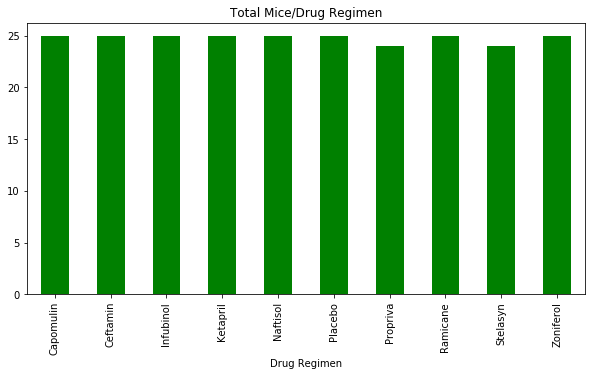

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

pdbar_regimen= regimen_tumor['Total Mice'].plot(kind='bar', color= 'g', figsize = (10, 5), title='Total Mice/Drug Regimen')


Text(0.5, 1.0, 'Total Mice/Drug Regimen')

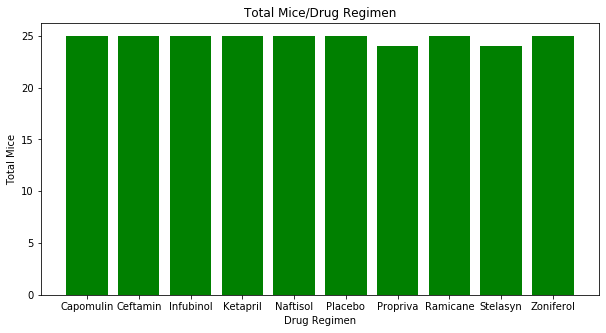

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
pltbar_regimen=plt.rcParams["figure.figsize"] = (10, 5)
pltbar_regimen= plt.bar(regimen_tumor.index,regimen_tumor['Total Mice'], color='green')
plt.ylabel('Total Mice')
plt.xlabel('Drug Regimen')
plt.title('Total Mice/Drug Regimen')

## Generate a pie plot showing the distribution of female versus male mice using pandas



([<matplotlib.patches.Wedge at 0x22c46bd4048>,
 [Text(0.0025334722871475025, 0.19998395315167228, 'Female'),
  Text(-0.0025334722871475273, -0.19998395315167228, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.60%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.40%')])

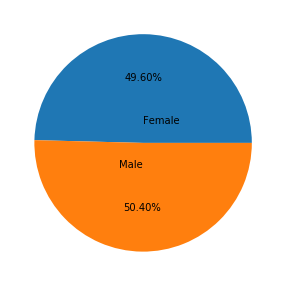

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df_count=sex_df.groupby('Sex').count().reset_index()
plt.pie(sex_df_count['Mouse ID'], autopct="%.2f%%", labels= sex_df_count['Sex'], labeldistance=0.2)
# sex_df_count['Mouse ID']

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [25]:
four_drdf=full_df.loc[(full_df["Drug Regimen"] == "Capomulin")|(full_df["Drug Regimen"] == "Ramicane" )|
                      (full_df["Drug Regimen"] == "Infubinol" )|(full_df["Drug Regimen"] == "Ceftamin"), :]
four_drdf=four_drdf.drop_duplicates((['Mouse ID']), keep= 'last')
four_drdf=four_drdf.rename(columns={'Tumor Volume (mm3)':'Last Tumor Volume'})
four_drdf=four_drdf.set_index('Mouse ID')

In [26]:
four_drdf

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Last Tumor Volume,Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
x822,Ceftamin,Male,3,29,45,61.386660,3
y163,Infubinol,Female,17,27,45,67.685569,3
y769,Ceftamin,Female,6,27,45,68.594745,4


I tried a different method for this, thinking that the code are only for guidelines, but since it was to be part of the challenge. I did it. Some of the cells are test on the first method. I split the tasks to serveral cells and one of the 

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    

    # add subset 
    
    
    # Determine outliers using upper and lower bounds



In [ ]:
# test full
# drug_list= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# tumor_vol= []
# q1 = four_drdf['Last Tumor Volume'].quantile(0.25)                 
# q3 = four_drdf['Last Tumor Volume'].quantile(0.75)
# iqr = q3 - q1
# # capo_df= four_drdf.loc[four_drdf['Drug Regimen']=='Capomulin', 'Last Tumor Volume']
# # rami_df= four_drdf.loc[four_drdf['Drug Regimen']=='Ramicane', 'Last Tumor Volume']
# # infu_df= four_drdf.loc[four_drdf['Drug Regimen']=='Infubinol', 'Last Tumor Volume']
# # ceft_df= four_drdf.loc[four_drdf['Drug Regimen']=='Ceftamin', 'Last Tumor Volume']
# # outlier_df=four_drdf.loc[(four_drdf['Last Tumor Volume'] <q1)|(four_drdf['Last Tumor Volume'] >q3)]
# lower_bound = q1 - (1.5*iqr)
# upper_bound = q3 + (1.5*iqr)      

# outlier_df=four_drdf.loc[(four_drdf['Last Tumor Volume'] <lower_bound)|(four_drdf['Last Tumor Volume'] >upper_bound)]
# fig1, ax1 = plt.subplots()

# ax1.boxplot(four_drdf['Last Tumor Volume'])
# plt.show()

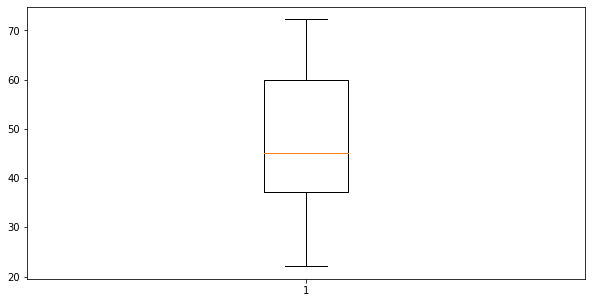

In [28]:
regi_tum=pd.DataFrame({'Drug':four_drdf['Drug Regimen'],'Tumor':four_drdf['Last Tumor Volume']})

capo_tu=[]
rami_tu=[]
infu_tu=[]
ceft_tu=[]
for x in regi_tum.index:
    if regi_tum['Drug'][x] ==  'Capomulin':
        capo_tu.append(regi_tum['Tumor'][x])
    if regi_tum['Drug'][x] ==  'Ramicane':
        rami_tu.append(regi_tum['Tumor'][x])
    if regi_tum['Drug'][x] ==  'Infubinol':
        infu_tu.append(regi_tum['Tumor'][x])
    if regi_tum['Drug'][x] ==  'Ceftamin':
        ceft_tu.append(regi_tum['Tumor'][x])
        

In [29]:
ca_q1 = np.percentile(capo_tu, 25)                 
ca_q3 = np.percentile(capo_tu, 75)  
ca_iqr = ca_q3 - ca_q1
ca_lower_bound = ca_q1 - (1.5*ca_iqr)
ca_upper_bound = ca_q3 + (1.5*ca_iqr) 

ra_q1 = np.percentile(rami_tu, 25)                 
ra_q3 = np.percentile(rami_tu, 75)  
ra_iqr = ra_q3 - ra_q1
ra_lower_bound = ra_q1 - (1.5*ra_iqr)
ra_upper_bound = ra_q3 + (1.5*ra_iqr) 

in_q1 = np.percentile(infu_tu, 25)                 
in_q3 = np.percentile(infu_tu, 75)  
in_iqr = in_q3 - in_q1
in_lower_bound = in_q1 - (1.5*in_iqr)
in_upper_bound = in_q3 + (1.5*in_iqr) 

ce_q1 = np.percentile(ceft_tu, 25)                 
ce_q3 = np.percentile(ceft_tu, 75)  
ce_iqr = ce_q3 - ce_q1
ce_lower_bound = ce_q1 - (1.5*ce_iqr)
ce_upper_bound = ce_q3 + (1.5*ce_iqr) 




In [30]:
oul_ca=[]
oul_ra=[]
oul_in=[]
oul_ce=[]
for y in capo_tu:
    if (y<ca_lower_bound) or (y>ca_upper_bound):
        oul_ca.append(y)
for y in rami_tu:
    if (y<ra_lower_bound) or (y>ra_upper_bound):
        oul_ra.append(y)

for y in infu_tu:
    if (y<in_lower_bound) or (y>in_upper_bound):
        oul_in.append(y)

for y in ceft_tu:
    if (y<ce_lower_bound) or (y>ce_upper_bound):
        oul_ce.append(y)
        
print(f'''   
            There are {len(oul_ca)} outliers for Capomulin. 
            There are {len(oul_ra)} outliers for Ramicane.
            There are {len(oul_in)} outliers for Infubinol.
            There are {len(oul_ce)} outliers for Ramicane.''')

   
            There are 0 outliers for Capomulin. 
            There are 0 outliers for Ramicane.
            There are 1 outliers for Infubinol.
            There are 0 outliers for Ramicane.


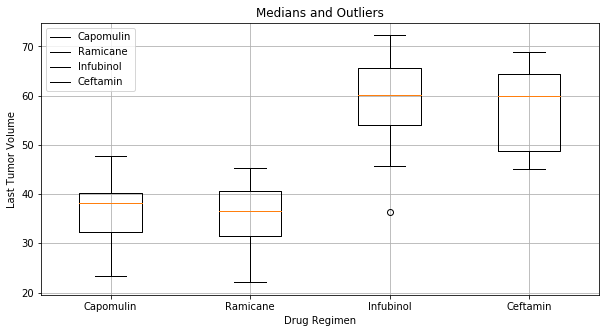

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ls_drugs= [capo_tu,rami_tu,infu_tu,ceft_tu]
sel_drugs=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig2, ax2 = plt.subplots()

ax2.boxplot(ls_drugs, labels=sel_drugs)
# ax2.boxplot(ls_drugs)
plt.ylabel('Last Tumor Volume')
plt.xlabel('Drug Regimen')
plt.title('Medians and Outliers')
plt.grid()
plt.legend(sel_drugs)
plt.show()

## Line and Scatter Plots

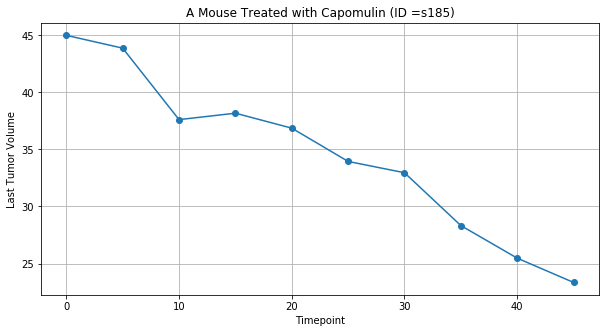

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = full_df.loc[full_df['Drug Regimen'] == 'Capomulin', :]
# capomulin=capomulin.set_index('Mouse ID')
# capomulin_gb= capomulin.groupby('Mouse ID')
ra_capomulin= capomulin.loc[ capomulin['Mouse ID']=='s185', :]
ra_mid_tp= pd.Series(ra_capomulin['Timepoint'])
ra_tum_vo=  pd.Series(ra_capomulin['Tumor Volume (mm3)'])

plt.ylabel('Last Tumor Volume')
plt.xlabel('Timepoint')
plt.title('A Mouse Treated with Capomulin (ID =s185)')
plt.grid()

plt.plot(ra_capomulin['Timepoint'], ra_capomulin['Tumor Volume (mm3)'], marker='o',)

 The correlation value of Weight and Tumor for Capomulin is 0.8419.


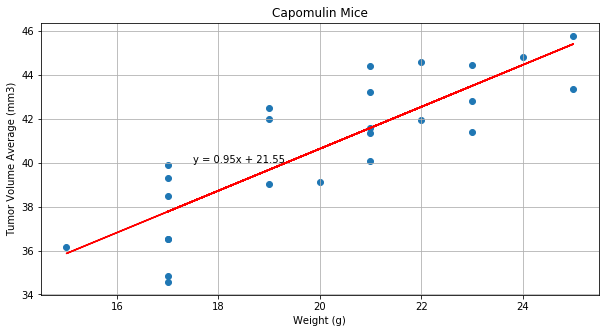

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


capomulin_re=capomulin.groupby('Mouse ID').mean()
# capomulin_re
from scipy.stats import linregress
x_values = capomulin_re['Weight (g)']
y_values = capomulin_re['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values, regress_values ,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume Average (mm3)')
plt.title('Capomulin Mice')
plt.grid()
plt.annotate(line_eq, (17.5,40))
correlation = st.pearsonr(capomulin_re['Weight (g)'],capomulin_re['Tumor Volume (mm3)'])
print(f' The correlation value of Weight and Tumor for Capomulin is {round(correlation[0], 4)}.')


## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#See Above Cell

correlation = st.pearsonr(capomulin_re['Weight (g)'],capomulin_re['Tumor Volume (mm3)'])
print(f' The correlation value of Weight and Tumor for Capomulin is {round(correlation[0], 4)}.')

 The correlation value of Weight and Tumor for Capomulin is 0.8419.


Three observations or inferences that can be made from the data.

Original tumor volun is 45 mm3.
1) The heavier the weight of a mouse tend to have higher tumor volume at the end of the experiment.(Note: this may only applied to mice treated with capomulin).

2) At the line plot for a mouse treated with Capomulin: over the course of 45 days. The tumor declined after 10 Days, regain a slight growth after 5 days later, but continued to decline. Inferring that Capomulin had to be continously provided or its effectiveness cannot be maintain. (When looking at data of other mouse (not a part of the submission), the results are different). Only third go down to 20-30 mm3. Most are in their 30s. 2 Mice got worse. NEVER USE A SINGLE RESULT TO CLAIM A SUCCESS STORY.

3) Capomulin and Ramicane are more effective for treating this tumor than Infubinol and Ceftamin. The other two increased the tumor.

4) Instructions can be extremly misleading.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.0,0
464,a251,Infubinol,Female,21,25,0,45.0,0
524,a577,Infubinol,Female,6,25,0,45.0,0
531,a685,Infubinol,Male,8,30,0,45.0,0
628,c139,Infubinol,Male,11,28,0,45.0,0
668,c326,Infubinol,Female,18,25,0,45.0,0
736,c895,Infubinol,Female,7,29,0,45.0,0
791,e476,Infubinol,Male,23,26,0,45.0,0
825,f345,Infubinol,Male,23,26,0,45.0,0
928,i386,Infubinol,Female,23,29,0,45.0,0
